# Demo to run ECmean4 functions within the AQUA framework

We load the AQUA module

In [13]:
from aqua import Reader
import xarray as xr

Start loading the ecmean functions, define the years of the experiments and experiment name. We define both atmospheric and oceanic models, as well initial and final years and the name of the configuration file. 

In [27]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model_atm = 'IFS'
model_oce = 'FESOM'
exp = 'tco79-orca1'
year1 = 2020
year2 = 2020
numproc = 1
interface = '../config/interface_AQUA.yml'
config = '../config/ecmean_config_replicability.yml'

Call the reader for the atmospheric and oceanic components. Currently separated to avoid conflicts between variables with same name. For safety, we remove sea ice from atmospheric dataset.

In [40]:
reader_atm = Reader(model="IFS", exp="tco79-orca1", source="lra-r100-mon", areas=False)
data_atm = reader_atm.retrieve()

type: [Errno 2] No such file or directory

In [37]:
data = xr.open_mfdataset("/scratch/project_465000454/sughosh/replicability_data/atm_2d.nc")
# data = data.rename({"msl":"psl"})
# data = data.rename({"2t":"tas"})
# data = data.rename({"tprate":"pr"})
data = data.drop(["msl","tprate"])
data = data.interp_like(xr.open_mfdataset("/pfs/lustrep3/scratch/project_465000454/AQUA-workflow/ecmean/weights/cell_area_r100.nc"))
data["2t"].attrs["unit"]=data["2t"].attrs["GRIB_units"]

In [7]:
xr.open_mfdataset("/pfs/lustrep3/scratch/project_465000454/kkeller/AQUA/diagnostics/ecmean/ECmean4/ecmean/climatology/EC23/r360x180/*")

In [38]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)
img = WImage(filename=f'/pfs/lustrep3/scratch/project_465000454/AQUA-workflow/ecmean/figures/global_mean_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
img

2023-08-08 19:04:23 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


Welcome to ECmean4 v0.1.4: Running global_mean!


2023-08-08 19:04:23 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!
2023-08-08 19:04:23 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-08-08 19:04:23 | ecmean.libs.support |  WARNING -> No mask available for oceanic vars, this might lead to inconsistent results...
2023-08-08 19:04:23 | ecmean.libs.files |  WARNING -> Variable psl requires msl which is not available in the model output. Ignoring it.
2023-08-08 19:04:23 | ecmean.libs.units |    ERROR -> 0.0036476381542950944 fraction / kelvin
Process Process-16:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ecmean/global_mean.py", line 85, in gm_worker
    units_handler = UnitsHandler(var, org_units=varunit, clim=ref, face=fa

type: 'tas'

# Performance indices
Basic call to performance indices

In [31]:
performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

2023-08-07 19:21:31 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...
2023-08-07 19:21:31 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!


Welcome to ECmean4 v0.1.4: Running performance_indices!


2023-08-07 19:21:35 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-08-07 19:21:37 | ecmean |  WARNING -> Preproc in 6.3015 seconds
2023-08-07 19:21:37 | ecmean.libs.files |  WARNING -> Variable ta requires t which is not available in the model output. Ignoring it.
2023-08-07 19:21:37 | ecmean.libs.files |  WARNING -> Variable ua requires u which is not available in the model output. Ignoring it.
2023-08-07 19:21:37 | ecmean.libs.files |  WARNING -> Variable va requires v which is not available in the model output. Ignoring it.
2023-08-07 19:21:37 | ecmean.libs.files |  WARNING -> Variable hus requires q which is not available in the model output. Ignoring it.
2023-08-07 19:21:37 | ecmean.libs.files |  WARNING -> Variable tas requires 2t which is not available in the model output. Ignoring it.
2023-08-07 19:21:37 | ecmean.libs.files |  WARNING -> Variable pr requires tprate which is not available in the model output. Ignoring it.
2023-08-07 19:21:37 | ecmean.

Open the obtained image file

sh: 0: getcwd() failed: No such file or directory


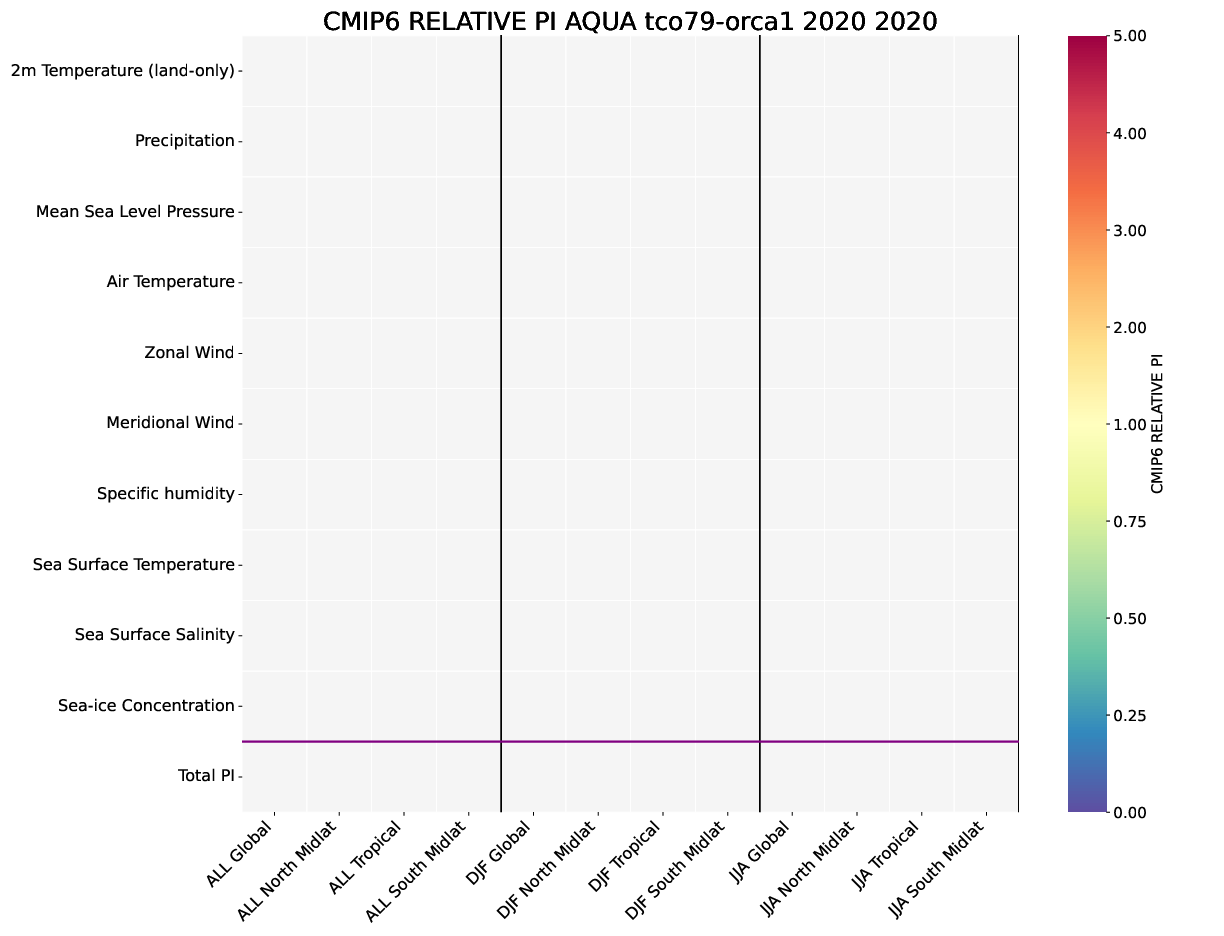

In [32]:
from aqua.util import load_yaml
cfg = load_yaml('../config/ecmean_config.yml')
img = WImage(filename=cfg['dirs']['fig']+f'/PI4_EC23_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
img